The data:

In [3]:
periods = [0.241, 0.615, 1.0, 1.88, 11.86, 29.50, 84.0, 165, 248]
a = [0.387 , 0.723 , 1.0 , 1.523 , 5.202 , 9.539 , 19.18 , 30.06 , 39.44]

Let's plot this:


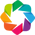

In [4]:
import holoviews as hv
hv.extension('bokeh')

In [11]:
hv.Curve((periods, a), kdims=['period'], vdims=['axis'])

:Curve   [period]   (axis)

Let's plot the log of $a$ instead:

In [12]:
import numpy as np

In [13]:
hv.Curve((periods, np.log(a)), kdims=['period'], vdims=['axis'])

:Curve   [period]   (axis)

Or both as logs.

In [14]:
hv.Curve((np.log(periods), np.log(a)), kdims=['period'], vdims=['axis'])

:Curve   [period]   (axis)

This seems to work better. Let's find the slope that works best using curve-fit.

In [15]:
from scipy.optimize import curve_fit

In [16]:
curve_fit(lambda x, a, b: a*x + b, np.log(periods), np.log(a))

(array([ 6.66618093e-01, -2.65258044e-04]),
 array([[ 3.54437825e-09, -7.73068688e-09],
        [-7.73068688e-09,  3.79355644e-08]]))

In [25]:
loglog = hv.Points((np.log(periods), np.log(a)), label='measurements') 
loglogfit = hv.Curve((np.log(periods), .66*np.log(periods) -2.65e-4), kdims=['period'], vdims=['axis'], label='model') 

In [27]:
loglogfit * loglog

:Overlay
   .Curve.Model         :Curve   [period]   (axis)
   .Points.Measurements :Points   [x,y]